### UIBVFED Folders

In [2]:
import os
import matplotlib.pyplot as plt
import numpy as np
import PIL.Image
import xlsxwriter
import shutil

# get a list of all the folders in the UIBVFED folder
folders = os.listdir('UIBVFED_cropped')

# remove any files that are not folders
folders = [f for f in folders if os.path.isdir(os.path.join('UIBVFED_cropped', f))]

folders

['ANGER', 'DISGUST', 'FEAR', 'JOY', 'NEUTRAL', 'SADNESS', 'SURPRISE']

### Selecting Virtual People

In [3]:
virtual_people = []
# loop through the NEUTRAL Folder
for file in os.listdir('UIBVFED_cropped/NEUTRAL'):
    # get the characters before the underscore
    name = file.split('_')[0]
    # add the name to the list
    virtual_people.append(name)

# remove duplicates
virtual_people = list(set(virtual_people))

virtual_people_filtered = []
for name in virtual_people:
    if name in ['Dave', 'Kurt', 'Lluis', 'Ramon', 'Tomeu']:
        virtual_people_filtered.append(name)
for name in virtual_people:
    if name in ['Alicia', 'Cristina', 'Sebastiana', 'Simona', 'Wanda']:
        virtual_people_filtered.append(name)

virtual_people_filtered_not_using = ['Damia', 'Catalina', 'Allan', 'Francisca', 'Joana', 'Pere', 'Jose', 'Isabel', 'Mateu', 'Maria']
virtual_people_filtered

['Ramon',
 'Lluis',
 'Dave',
 'Kurt',
 'Tomeu',
 'Simona',
 'Sebastiana',
 'Wanda',
 'Alicia',
 'Cristina']

### Getting UIBVFED expressions

In [4]:
expressions = []
for folder in folders:
    for file in os.listdir('UIBVFED_cropped/' + folder):
        # get the characters after the underscore
        if '_' not in file:
            continue
        name = file.split('_')[1]
        # remove the .png extension
        name = name.split('.')[0]
        # add the name to the list
        expressions.append(name)

# remove duplicates
expressions = list(set(expressions))

expressions_filtered = []
for expression in expressions:
    if expression in ['EnragedShouting', 'PhysicalRepulsion', 'Terror', 'SmilingClosedMouth', 'NearlyCrying', 'Neutral', 'Surprise']:
        expressions_filtered.append(expression)

expressions_filtered

['SmilingClosedMouth',
 'NearlyCrying',
 'Neutral',
 'Terror',
 'EnragedShouting',
 'Surprise',
 'PhysicalRepulsion']

### Functions to get paths of the images

In [5]:
def get_virtual_person_path(person, expression):
    path = ''
    for folder in folders:
        for file in os.listdir('UIBVFED_cropped/' + folder):
            if not file.endswith('.png'):
                continue
            if file == person + '_' + expression + '.png':
                path = 'UIBVFED_cropped/' + folder + '/' + file
                break
    return path

def get_real_person_path(person, expression):
    path = ''
    for folders in os.listdir('RADIATE Color Faces'):
        for subfolder in os.listdir('RADIATE Color Faces/' + folders):
            if subfolder == person:
                for file in os.listdir('RADIATE Color Faces/' + folders + '/' + subfolder):
                    if file == person + '_' + expression + '.bmp':
                        path = 'RADIATE Color Faces/' + folders + '/' + subfolder + '/' + person + '_' + expression + '.bmp'
                        break
    return path

### Display of discarded Virtual People

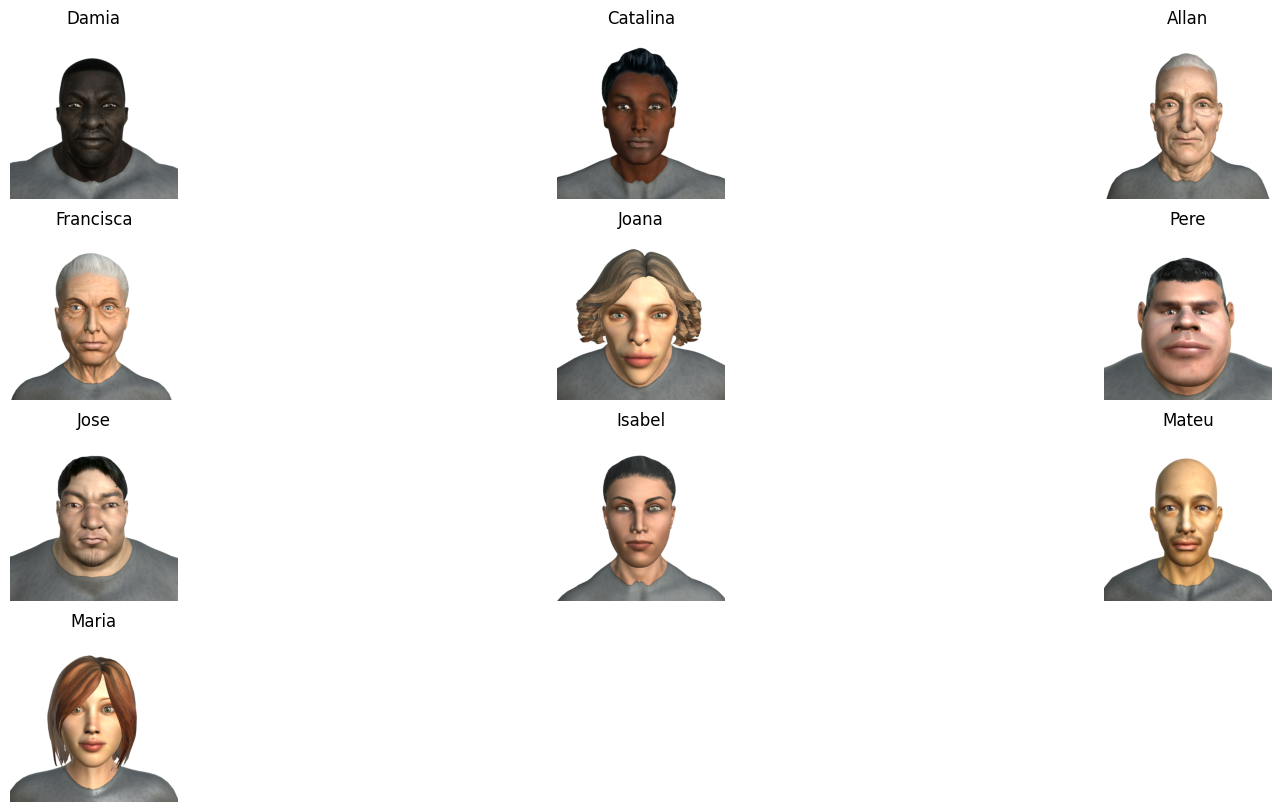

In [6]:
fig = plt.figure(figsize=(20, 10))
columns = 3
rows = 4
for i in range(1, columns * rows + 1):
    if i > len(virtual_people_filtered_not_using):
        break
    # get the path to the image
    path = get_virtual_person_path(virtual_people_filtered_not_using[i - 1], 'Neutral')
    # load the image
    img = PIL.Image.open(path)
    # add the image to the grid
    fig.add_subplot(rows, columns, i)
    # hide the axis
    plt.axis('off')
    # add the title
    plt.title(virtual_people_filtered_not_using[i - 1])
    # display the image
    plt.imshow(img)

### Getting RADIATE expressions

In [7]:
radiate_folders_path = 'RADIATE Color Faces'
radiate_folders = ['RADIATE_COLOR_8/HM10', 'RADIATE_COLOR_10/WM11', 'RADIATE_COLOR_7/HM02', 'RADIATE_COLOR_5/BM05', 'RADIATE_COLOR_7/HM08', 'RADIATE_COLOR_1/AF10', 'RADIATE_COLOR_7/HF09', 'RADIATE_COLOR_9/WF12', 'RADIATE_COLOR_3/BF05', 'RADIATE_COLOR_8/WF05']
radiate_expressions = []

for folder in radiate_folders:
    path = radiate_folders_path + '/' + folder
    # for each bmp file in the folder, convert it to png
    for file in os.listdir(path):
        # if file name does not end with .bmp, skip it
        if not file.endswith('.bmp'):
            continue
        # get the characters after the underscore
        exp = file.split('_')[1]
        # remove the .png extension
        exp = exp.split('.')[0]
        # add the name to the list
        radiate_expressions.append(exp)
        # get the name of the file without the extension
        name = file.split('.')[0]
        # load the image
        img = PIL.Image.open(path + '/' + file)
        # save the image as a png
        img.save(path + '/' + name + '.png')

# remove duplicates
radiate_expressions = list(set(radiate_expressions))

radiate_expressions

['HC',
 'HO',
 'AC',
 'FC',
 'DC',
 'FO',
 'NO',
 'SC',
 'HE',
 'NC',
 'SO',
 'CO',
 'CC',
 'DO',
 'AO',
 'SUR']

### Helpful mappings/lists

In [8]:
uibvfed_expressions_to_folders = {
    'JOY': 'SmilingClosedMouth',
    'FEAR': 'Terror',
    'ANGER': 'EnragedShouting',
    'DISGUST': 'PhysicalRepulsion',
    'SADNESS': 'NearlyCrying',
    'NEUTRAL': 'Neutral',
    'SURPRISE': 'Surprise'
}

emotion_to_radiate = {
    'JOY': 'HC',
    'FEAR': 'FO',
    'ANGER': 'AO',
    'DISGUST': 'DC',
    'SADNESS': 'SC',
    'NEUTRAL': 'NC',
    'SURPRISE': 'SUR'
}

emotion_types = {
    'JOY': 0,
    'FEAR': 1,
    'ANGER': 2,
    'DISGUST': 3,
    'SADNESS': 4,
    'NEUTRAL': 5,
    'SURPRISE': 6
}

face_types = {
    'Virtual': 0,
    'Real': 1
}

virtual_people_types = {
    'Dave': 0,
    'Kurt': 1,
    'Lluis': 2,
    'Ramon': 3,
    'Tomeu': 4,
    'Alicia': 5,
    'Cristina': 6,
    'Sebastiana': 7,
    'Simona': 8,
    'Wanda': 9
}

real_people_types = {
    'HM10': 0,
    'WM11': 1,
    'HM02': 2,
    'BM05': 3,
    'HM08': 4,
    'AF10': 5,
    'HF09': 6,
    'WF12': 7,
    'BF05': 8,
    'WF05': 9
}

real_people = ['HM10', 'WM11', 'HM02', 'BM05', 'HM08', 'AF10', 'HF09', 'WF12', 'BF05', 'WF05']
males = ['HM10', 'WM11', 'HM02', 'BM05', 'HM08', 'Dave', 'Kurt', 'Lluis', 'Ramon', 'Tomeu']
females = ['AF10', 'HF09', 'WF12', 'BF05', 'WF05', 'Alicia', 'Cristina', 'Sebastiana', 'Simona', 'Wanda']

### Generating Blocks

In [9]:
emotions = ['JOY', 'FEAR', 'ANGER', 'DISGUST', 'SADNESS', 'NEUTRAL', 'SURPRISE']
block_design = []
blocks_left = 56
real_blocks = blocks_left / 2
virtual_blocks = blocks_left / 2

# pick a random emotion from the list and remove it
while blocks_left > 0:
    # pick a random emotion from the list
    emotion = np.random.choice(len(emotions))

    # pick either virtual or real
    if real_blocks != 0 and virtual_blocks != 0:
        person_type = np.random.choice(2)
    elif real_blocks == 0 and virtual_blocks != 0:
        person_type = 0
    else:
        person_type = 1


    markers = []
    # decide if the block will be virtual or real
    if person_type == 0:
        # pick a random virtual person with the emotion 8 times
        virtual_people_filtered_holder = virtual_people_filtered.copy()
        block = []
        while len(block) < 8:
            person = np.random.choice(virtual_people_filtered)
            
            if person not in block:
                block.append(person)
                markers.append(int("0" + str(emotion_types[emotions[emotion]]) + str(virtual_people_types[person])))

            if len(block) == 8:
                # check there are 4 males and 4 females
                males_count = 0
                females_count = 0
                for person in block:
                    if person in males:
                        males_count += 1
                    elif person in females:
                        females_count += 1
                
                if males_count == 4 and females_count == 4:
                    if np.random.choice(2) == 0:
                        # do while loop to make sure the person is in the block
                        while True:
                            person = np.random.choice(virtual_people_filtered)
                            if person in block:
                                break
                    else:
                        #do while loop to make sure the person is not in the block
                        while True:
                            person = np.random.choice(virtual_people_filtered)
                            if person not in block:
                                break

                    # replace the names with the path to the image
                    for i in range(len(block)):
                        block[i] = get_virtual_person_path(block[i], uibvfed_expressions_to_folders[emotions[emotion]])
                    virtual_blocks -= 1
                    block = ["Virtual", emotions[emotion], block, get_virtual_person_path(person, uibvfed_expressions_to_folders[emotions[emotion]]), markers, int("0" + str(emotion_types[emotions[emotion]]) + str(virtual_people_types[person]))]
                    break
                else:
                    block = []
                    markers = []
    else:
        # pick a random real person with the emotion 8 times
        real_people_holder = real_people.copy()
        block = []
        while len(block) < 8:
            person = np.random.choice(real_people)
            
            if person not in block:
                block.append(person)
                markers.append(int("1" + str(emotion_types[emotions[emotion]]) + str(real_people_types[person])))

            if len(block) == 8:
                # check there are 4 males and 4 females
                males_count = 0
                females_count = 0
                for person in block:
                    if person in males:
                        males_count += 1
                    elif person in females:
                        females_count += 1
                
                if males_count == 4 and females_count == 4:
                    if np.random.choice(2) == 0:
                        # do while loop to make sure the person is in the block
                        while True:
                            person = np.random.choice(real_people)
                            if person in block:
                                break
                    else:
                        # do while loop to make sure the person is not in the block
                        while True:
                            person = np.random.choice(real_people)
                            if person not in block:
                                break

                    # replace the names with the path to the image
                    for i in range(len(block)):
                        block[i] = get_real_person_path(block[i], emotion_to_radiate[emotions[emotion]])
                    real_blocks -= 1
                    block = ["Real", emotions[emotion], block, get_real_person_path(person, emotion_to_radiate[emotions[emotion]]), markers, int("1" + str(emotion_types[emotions[emotion]]) + str(real_people_types[person]))]
                    break
                else:
                    block = []
                    markers = []
    
    # add the block to the design
    block_design.append(block)

    # remove the emotion from the list
    emotions.pop(emotion)
    if len(emotions) == 0:
        emotions = ['JOY', 'FEAR', 'ANGER', 'DISGUST', 'SADNESS', 'NEUTRAL', 'SURPRISE']

    blocks_left -= 1

block_design

[['Virtual',
  'DISGUST',
  ['UIBVFED_cropped/DISGUST/Tomeu_PhysicalRepulsion.png',
   'UIBVFED_cropped/DISGUST/Lluis_PhysicalRepulsion.png',
   'UIBVFED_cropped/DISGUST/Simona_PhysicalRepulsion.png',
   'UIBVFED_cropped/DISGUST/Cristina_PhysicalRepulsion.png',
   'UIBVFED_cropped/DISGUST/Kurt_PhysicalRepulsion.png',
   'UIBVFED_cropped/DISGUST/Wanda_PhysicalRepulsion.png',
   'UIBVFED_cropped/DISGUST/Sebastiana_PhysicalRepulsion.png',
   'UIBVFED_cropped/DISGUST/Ramon_PhysicalRepulsion.png'],
  'UIBVFED_cropped/DISGUST/Dave_PhysicalRepulsion.png',
  [34, 32, 38, 36, 31, 39, 37, 33],
  30],
 ['Real',
  'NEUTRAL',
  ['RADIATE Color Faces/RADIATE_COLOR_3/BF05/BF05_NC.bmp',
   'RADIATE Color Faces/RADIATE_COLOR_9/WF12/WF12_NC.bmp',
   'RADIATE Color Faces/RADIATE_COLOR_7/HF09/HF09_NC.bmp',
   'RADIATE Color Faces/RADIATE_COLOR_8/HM10/HM10_NC.bmp',
   'RADIATE Color Faces/RADIATE_COLOR_7/HM08/HM08_NC.bmp',
   'RADIATE Color Faces/RADIATE_COLOR_5/BM05/BM05_NC.bmp',
   'RADIATE Color Faces/R

### Checking the generated blocks

In [10]:
# print the number of face_type-emotion blocks
face_type_emotion_counts = {}
for block in block_design:
    block = block[0] + '-' + block[1]
    if block not in face_type_emotion_counts:
        face_type_emotion_counts[block] = 1
    else:
        face_type_emotion_counts[block] += 1

print('Face type-emotion counts:')
for key, value in face_type_emotion_counts.items():
    print(f'{key}: {value}')

Face type-emotion counts:
Virtual-DISGUST: 3
Real-NEUTRAL: 3
Virtual-JOY: 5
Virtual-SADNESS: 4
Real-SURPRISE: 7
Real-FEAR: 4
Virtual-ANGER: 6
Virtual-NEUTRAL: 5
Real-DISGUST: 5
Real-ANGER: 2
Real-JOY: 3
Virtual-FEAR: 4
Real-SADNESS: 4
Virtual-SURPRISE: 1


### Generating xlsk files for Psychopy

In [11]:
# delete any xlsx files in the current directory
for file in os.listdir():
    if file.endswith('.xlsx'):
        os.remove(file)

# create a new xlsx file to store the block file names
workbook_blocks = xlsxwriter.Workbook('blocks.xlsx')
worksheet_blocks = workbook_blocks.add_worksheet()
worksheet_blocks.write(0, 0, 'blocknames')
worksheet_blocks.write(0, 1, 'tasknames')
worksheet_blocks.write(0, 2, 'taskmarker')
worksheet_blocks.write(0, 3, 'blocknumber')


for block in block_design:
    row = block_design.index(block) + 1
    worksheet_blocks.write(row, 1, block[3])
    worksheet_blocks.write(row, 2, block[5] + 2000)
    worksheet_blocks.write(row, 3, row + 1000)

block_count = 0
for block in block_design:
    block_count += 1
    workbook = xlsxwriter.Workbook('block' + str(block_count) + block[0] + block[1] + '.xlsx')
    worksheet = workbook.add_worksheet()
    row = 0

    worksheet.write(row, 0, 'filepaths')
    worksheet.write(row, 1, 'marker')
    row += 1
    for path in block[2]:
        worksheet.write(row, 0, path)
        row += 1

    row = 1
    for marker in block[4]:
        worksheet.write(row, 1, marker)
        row += 1
    
    worksheet_blocks.write(block_count, 0, 'block' + str(block_count) + block[0] + block[1] + '.xlsx')

    workbook.close()

workbook_blocks.close()

### Copying the generated xlsk files to the correct folder

In [14]:
new_participant = True
folder_name = 'data'

# get a list of all the folders in the data directory
participants = [p for p in os.listdir(folder_name) if os.path.isdir(os.path.join(folder_name, p))]

# extract the participant number from the participant folders
participant_numbers = []
for p in participants:
    participant_numbers.append(int(p.split('_')[1]))

    # check if there is a folder called ordering inside the participant folder
    if 'ordering' not in os.listdir(os.path.join(folder_name, p)):
        # create the ordering folder
        os.mkdir(os.path.join(folder_name, p, 'ordering'))
        print('Created ordering folder for participant', p)

# find the largest participant number
if len(participant_numbers) == 0:
    num_participants = 0
else:
    num_participants = max(participant_numbers)

if new_participant:
    # create a new participant folder
    new_participant_folder = os.path.join(folder_name, 'P_' + str(num_participants + 1))
    os.mkdir(new_participant_folder)
    os.mkdir(os.path.join(new_participant_folder, 'ordering'))
    print('Created new participant folder:', new_participant_folder)

    # find all xlsx files in the current directory
    files = [f for f in os.listdir() if f.endswith('.xlsx')]
    print('Found the following files:', files)

    # copy the files to the new ordering folder, don't move the original files
    for f in files:
        shutil.copy(f, os.path.join(new_participant_folder, 'ordering'))
    
    print('Copied files to new participant folder:', new_participant_folder)

Created new participant folder: data\P_92
Found the following files: ['block10RealSURPRISE.xlsx', 'block11VirtualDISGUST.xlsx', 'block12VirtualJOY.xlsx', 'block13VirtualSADNESS.xlsx', 'block14VirtualANGER.xlsx', 'block15RealDISGUST.xlsx', 'block16RealANGER.xlsx', 'block17VirtualNEUTRAL.xlsx', 'block18RealJOY.xlsx', 'block19VirtualFEAR.xlsx', 'block1VirtualDISGUST.xlsx', 'block20VirtualSADNESS.xlsx', 'block21RealSURPRISE.xlsx', 'block22VirtualNEUTRAL.xlsx', 'block23VirtualDISGUST.xlsx', 'block24RealSADNESS.xlsx', 'block25VirtualANGER.xlsx', 'block26RealSURPRISE.xlsx', 'block27VirtualFEAR.xlsx', 'block28RealJOY.xlsx', 'block29VirtualJOY.xlsx', 'block2RealNEUTRAL.xlsx', 'block30VirtualNEUTRAL.xlsx', 'block31VirtualSADNESS.xlsx', 'block32VirtualANGER.xlsx', 'block33RealSURPRISE.xlsx', 'block34RealFEAR.xlsx', 'block35RealDISGUST.xlsx', 'block36VirtualSURPRISE.xlsx', 'block37RealFEAR.xlsx', 'block38RealSADNESS.xlsx', 'block39VirtualANGER.xlsx', 'block3VirtualJOY.xlsx', 'block40RealDISGUST.xl

In [13]:
""" # HM06 no SC, WF09 no AO
plt.ioff()
for key2, value2 in virtual_to_real.items():
    for key, value in radiate_to_uibvfed.items():
        fig = plt.figure(figsize=(20, 10))
        columns = 4
        rows = 4
        fig.add_subplot(rows, columns, 1)
        plt.axis('off')
        plt.title('HC')
        plt.imshow(PIL.Image.open('RADIATE Color Faces/' + value2 + '/' + value2.split('/')[1].split('_')[0] + '_HC.png'))
        fig.add_subplot(rows, columns, 2)
        plt.axis('off')
        plt.title('SmilingClosedMouth')
        plt.imshow(PIL.Image.open('UIBVFED/JOY/' + key2 + '_SmilingClosedMouth.png').crop((250, 50, 1050, 750)))
        fig.add_subplot(rows, columns, 3)
        plt.axis('off')
        plt.title('SC')
        plt.imshow(PIL.Image.open('RADIATE Color Faces/' + value2 + '/' + value2.split('/')[1].split('_')[0] + '_SC.png'))
        fig.add_subplot(rows, columns, 4)
        plt.axis('off')
        plt.title('SuppressedSadness')
        plt.imshow(PIL.Image.open('UIBVFED/SADNESS/' + key2 + '_NearlyCrying.png').crop((250, 50, 1050, 750)))
        fig.add_subplot(rows, columns, 5)
        plt.axis('off')
        plt.title('FO')
        plt.imshow(PIL.Image.open('RADIATE Color Faces/' + value2 + '/' + value2.split('/')[1].split('_')[0] + '_FO.png'))
        fig.add_subplot(rows, columns, 6)
        plt.axis('off')
        plt.title('Terror')
        plt.imshow(PIL.Image.open('UIBVFED/FEAR/' + key2 + '_Terror.png').crop((250, 50, 1050, 750)))
        fig.add_subplot(rows, columns, 7)
        plt.axis('off')
        plt.title('AO')
        plt.imshow(PIL.Image.open('RADIATE Color Faces/' + value2 + '/' + value2.split('/')[1].split('_')[0] + '_AO.png'))
        fig.add_subplot(rows, columns, 8)
        plt.axis('off')
        plt.title('EnragedShouting')
        plt.imshow(PIL.Image.open('UIBVFED/ANGER/' + key2 + '_EnragedShouting.png').crop((250, 50, 1050, 750)))
        fig.add_subplot(rows, columns, 9)
        plt.axis('off')
        plt.title('DC')
        plt.imshow(PIL.Image.open('RADIATE Color Faces/' + value2 + '/' + value2.split('/')[1].split('_')[0] + '_DC.png'))
        fig.add_subplot(rows, columns, 10)
        plt.axis('off')
        plt.title('PhysicalRepulsion')
        plt.imshow(PIL.Image.open('UIBVFED/DISGUST/' + key2 + '_PhysicalRepulsion.png').crop((250, 50, 1050, 750)))
        fig.add_subplot(rows, columns, 11)
        plt.axis('off')
        plt.title('NC')
        plt.imshow(PIL.Image.open('RADIATE Color Faces/' + value2 + '/' + value2.split('/')[1].split('_')[0] + '_NC.png'))
        fig.add_subplot(rows, columns, 12)
        plt.axis('off')
        plt.title('Neutral')
        plt.imshow(PIL.Image.open('UIBVFED/NEUTRAL/' + key2 + '_Neutral.png').crop((250, 50, 1050, 750)))
        fig.add_subplot(rows, columns, 13)
        plt.axis('off')
        plt.title('SUR')
        plt.imshow(PIL.Image.open('RADIATE Color Faces/' + value2 + '/' + value2.split('/')[1].split('_')[0] + '_SUR.png'))
        fig.add_subplot(rows, columns, 14)
        plt.axis('off')
        plt.title('Surprise')
        plt.imshow(PIL.Image.open('UIBVFED/SURPRISE/' + key2 + '_Surprise.png').crop((250, 50, 1050, 750)))
    plt.savefig('saved_images/' + key2 + " and " + value2.split('/')[1].split('_')[0] + '.png', dpi=300, bbox_inches='tight', pad_inches=0)
plt.ion() """

' # HM06 no SC, WF09 no AO\nplt.ioff()\nfor key2, value2 in virtual_to_real.items():\n    for key, value in radiate_to_uibvfed.items():\n        fig = plt.figure(figsize=(20, 10))\n        columns = 4\n        rows = 4\n        fig.add_subplot(rows, columns, 1)\n        plt.axis(\'off\')\n        plt.title(\'HC\')\n        plt.imshow(PIL.Image.open(\'RADIATE Color Faces/\' + value2 + \'/\' + value2.split(\'/\')[1].split(\'_\')[0] + \'_HC.png\'))\n        fig.add_subplot(rows, columns, 2)\n        plt.axis(\'off\')\n        plt.title(\'SmilingClosedMouth\')\n        plt.imshow(PIL.Image.open(\'UIBVFED/JOY/\' + key2 + \'_SmilingClosedMouth.png\').crop((250, 50, 1050, 750)))\n        fig.add_subplot(rows, columns, 3)\n        plt.axis(\'off\')\n        plt.title(\'SC\')\n        plt.imshow(PIL.Image.open(\'RADIATE Color Faces/\' + value2 + \'/\' + value2.split(\'/\')[1].split(\'_\')[0] + \'_SC.png\'))\n        fig.add_subplot(rows, columns, 4)\n        plt.axis(\'off\')\n        plt.title